<a href="https://colab.research.google.com/github/gargneha372/Lending_Club_Case_Study/blob/main/LC_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing all the Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load The Data

In [ ]:
Loan_df = pd.read_csv("loan.csv")
Loan_df.head()

<ipython-input-7-1d6c9f2c65b2>:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  Loan_df = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#Basic information about the data and Understanding of Data Columns

In [ ]:
## Number of rows and columns
print('Number of Columns:',Loan_df.shape[1])
print('Number of Rows:',Loan_df.shape[0])
## Number of missing values
print('Number of missing values:',Loan_df.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',Loan_df.nunique().sum())
## Number of duplicates
print('Number of duplicates:',Loan_df.duplicated().sum())

Number of Columns: 111
Number of Rows: 39717
Number of missing values: 2263366
Number of unique values: 416800
Number of duplicates: 0


In [ ]:
Loan_df.dtypes

,0
id,int64
member_id,int64
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
...,...
tax_liens,float64
tot_hi_cred_lim,float64
total_bal_ex_mort,float64
total_bc_limit,float64


In [ ]:
Total_Null_Perc= (Loan_df.isnull().sum()/Loan_df.shape[0]*100).round(2).sort_values(ascending=False)
print(Total_Null_Perc)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


Delete Columns which has >30% null values

In [ ]:
Loan_df.drop(Total_Null_Perc[Total_Null_Perc>30].index,axis=1,inplace=True)
print(Loan_df.shape)

(39717, 53)


In [ ]:
Loan_df.nunique().sort_values()

,0
tax_liens,1
delinq_amnt,1
chargeoff_within_12_mths,1
acc_now_delinq,1
application_type,1
policy_code,1
collections_12_mths_ex_med,1
initial_list_status,1
pymnt_plan,1
term,2


Removing columns which has only one unique values because that will not give useful information for Analysis.

In [ ]:
Loan_df.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [ ]:
Loan_df.shape

(39717, 44)

In [ ]:
Loan_df.nunique().sort_values(ascending=False)

,0
id,39717
url,39717
member_id,39717
total_pymnt,37850
total_pymnt_inv,37518
total_rec_int,35148
last_pymnt_amnt,34930
emp_title,28820
revol_bal,21711
title,19615


Removing columns which has high unique values like URL and Member ID, as ID column can be used as primary Key for the data

In [ ]:
Loan_df.drop(['url', 'member_id'], axis=1, inplace=True)

Removing emp_title and title column as it is a Text column and has more unique values

In [ ]:
Loan_df.drop(['title', 'emp_title'], axis=1, inplace=True)

In [ ]:
Loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

Removing Column Zip_code as we have address code to identify the state

In [ ]:
Loan_df.drop(['zip_code'],axis=1,inplace=True)

Loan_Status column has 3 unique values Fully_paid, Current and Charged off.... Removing the rows where Loan_status has "Current" as the loan has not been paid off yet so we can't perform analysis on that.

In [ ]:
Loan_df=Loan_df[Loan_df['loan_status'] != 'Current']

Removing columns which might not helpful for our purpose

In [ ]:
Loan_df=Loan_df.drop(['earliest_cr_line','pub_rec','revol_bal','revol_util','out_prncp','out_prncp_inv','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1)

As it's a internal variable after approving the loan, it will not affect our analysis.

In [ ]:
Loan_df=Loan_df.drop(['funded_amnt_inv'],axis=1)
print(Loan_df.shape)

(38577, 23)


#Check the Data Types, Missing values and Outliers

**Check Data types**

In [ ]:
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

**Converting Data Types** : Columns "Int_rate", "emp_length" are in object... Convert these into **Numeric**

In [ ]:
Loan_df[['int_rate']] = Loan_df[['int_rate']].replace('%', '', regex=True).astype(float)

Check Missing Values

In [ ]:
round((Loan_df.isnull().sum()/Loan_df.shape[0]*100),2).sort_values(ascending=False).head(5)

,0
emp_length,2.68
pub_rec_bankruptcies,1.81
issue_d,0.00
total_pymnt,0.00
total_acc,0.00


In [ ]:
Loan_df['pub_rec_bankruptcies'].value_counts()/Loan_df['pub_rec_bankruptcies'].shape[0]

,count
pub_rec_bankruptcies,
0.0,0.939368
1.0,0.042435
2.0,0.000130


In [ ]:
Loan_df['emp_length'].value_counts()

,count
emp_length,
10+ years,8488
< 1 year,4508
2 years,4291
3 years,4012
4 years,3342
5 years,3194
1 year,3169
6 years,2168
7 years,1711


**Treat Missing Values**

Column "pub_rec_bankruptcies" has 3 unique categories and 1.8% missing values.
Hence filling the null values with 0 as 93% values are 0

In [ ]:
Loan_df['pub_rec_bankruptcies'].fillna(0,inplace=True)

<ipython-input-28-a977eadfd8ed>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Loan_df['pub_rec_bankruptcies'].fillna(0,inplace=True)


Column "emp_length" has 11 unique categories and 2.68% missing values.
Removing these rows could be loss of information hence giving a new category name because for most of the values for "emp_title" column are blank

In [ ]:
Loan_df['emp_length'].fillna("Self_Employed",inplace=True)

<ipython-input-29-2ea0977c350e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Loan_df['emp_length'].fillna("Self_Employed",inplace=True)


In [ ]:
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            38577 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

**Columns Summary**

*Categorical_columns* - [term, grade, subgrade, emp_length, home_ownership, verification_status, issue_d, purpose, addr_state]

*Numeric_columns* - [loan_amnt, funded_amnt, int_rate, installment, annual_inc, dti, delinq_2yrs, inq_last_6mths, open_acc, total_acc, total_pymnt,pub_rec_bankruptcies]

*Target_Column* - ['loan_status']

*ID_column* - [ID]

**Check Outliers**

1. loan_amnt

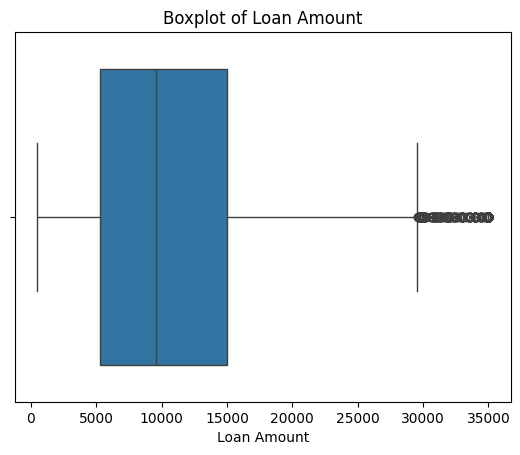

In [ ]:
sns.boxplot(x=Loan_df['loan_amnt'])
plt.title("Boxplot of Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

Box plot for "Loan_amount" has upper whisker limit is ~29k and some outliers are there which can be treated by IQR method

In [ ]:
# # Calculate Q1, Q3, and IQR
Q1 = Loan_df['loan_amnt'].quantile(0.25)
Q3 = Loan_df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Option 2: Cap outliers
Loan_df['loan_amnt'] = Loan_df['loan_amnt'].clip(lower_bound, upper_bound)
# Loan_df = Loan_df['loan_amnt'].clip(lower_bound, upper_bound)

2. funded_amnt

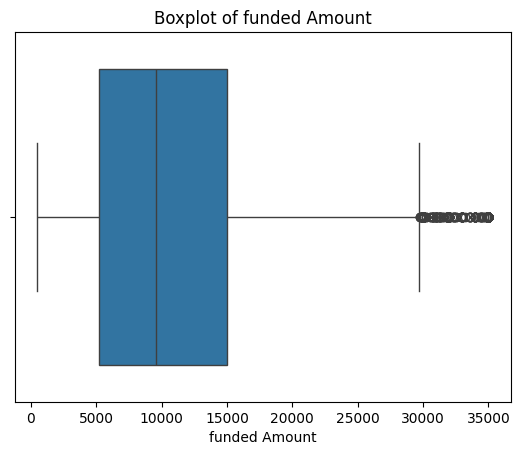

In [ ]:
sns.boxplot(x=Loan_df['funded_amnt'])
plt.title("Boxplot of funded Amount")
plt.xlabel("funded Amount")
plt.show()

In [ ]:
# # Calculate Q1, Q3, and IQR
Q1 = Loan_df['funded_amnt'].quantile(0.25)
Q3 = Loan_df['funded_amnt'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Option 2: Cap outliers
Loan_df['funded_amnt'] = Loan_df['funded_amnt'].clip(lower_bound, upper_bound)

3. annual_inc

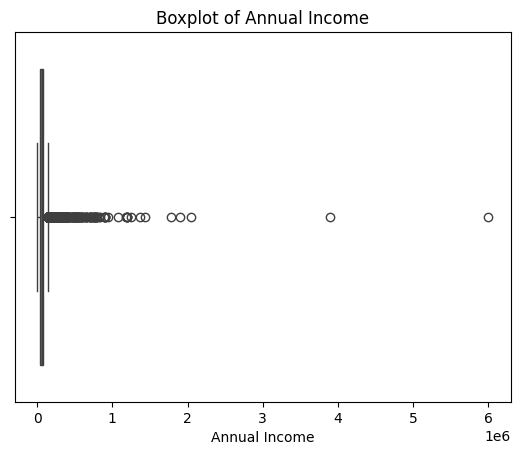

In [ ]:
sns.boxplot(x=Loan_df['annual_inc'])
plt.title("Boxplot of Annual Income")
plt.xlabel("Annual Income")
plt.show()

In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = Loan_df['annual_inc'].quantile(0.25)
Q3 = Loan_df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

# Count total outliers
outliers = Loan_df[(Loan_df['annual_inc'] < lower_bound) | (Loan_df['annual_inc'] > upper_bound)]
total_outliers = outliers.shape[0]

print("Total number of outliers:", total_outliers)


-23000.0
145000.0
Total number of outliers: 1762


Treat Outliers with IQR method and cap outliers with upper bound value

In [ ]:
Loan_df['annual_inc'] = Loan_df['annual_inc'].clip(upper=145000)

Now the whole data has been cleaned and treated with missing values as well as outliers

#Data Analysis

**Univariate Analysis**

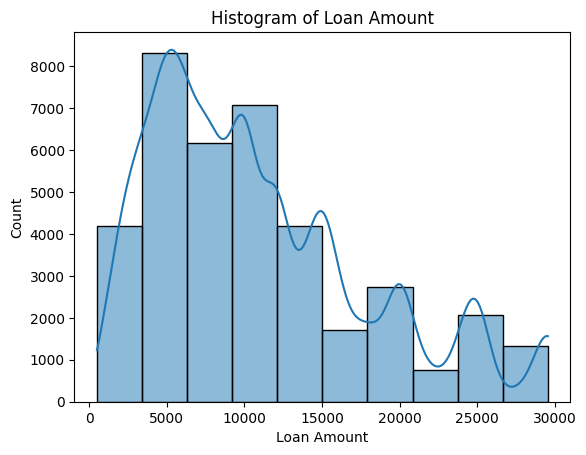

In [ ]:
sns.histplot(x=Loan_df['loan_amnt'], bins=10,kde=True)
plt.title("Histogram of Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

In [ ]:
Loan_df['loan_amnt'].describe()

,loan_amnt
count,38577.000000
mean,10947.966405
std,7058.665784
min,500.000000
25%,5300.000000
50%,9600.000000
75%,15000.000000
max,29550.000000


Observation : 75% people have taken the loan below 1,50,000 amount. Very few people are taking the loan more than Rs. 2,00,000.

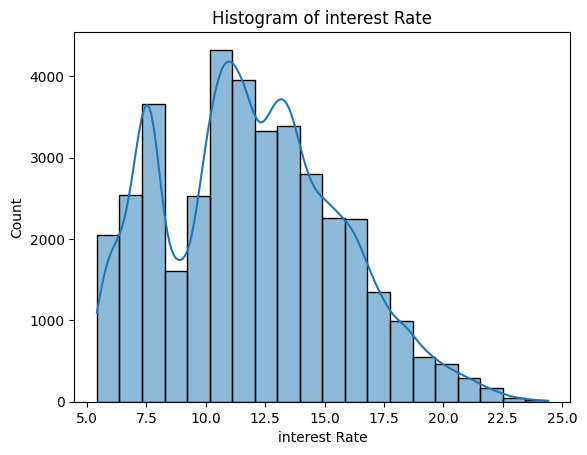

In [ ]:
sns.histplot(x=Loan_df['int_rate'], bins=20,kde=True)
plt.title("Histogram of interest Rate")
plt.xlabel("interest Rate")
plt.show()

Observation : The above histogram shows that most of the interest rates lies between 10% to 14.9%. Some people took loan at higher rates of interest i.e., 22.5%

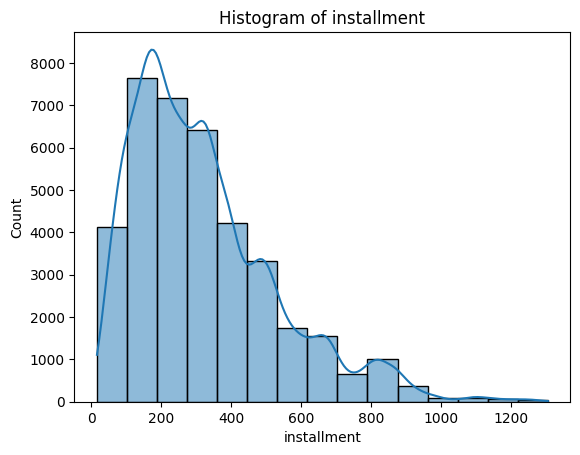

In [ ]:
sns.histplot(x=Loan_df['installment'], bins=15,kde=True)
plt.title("Histogram of installment")
plt.xlabel("installment")
plt.show()

Observation : Maximum Installment lies between 100 to 450. Few people have decided to keep more installment amount

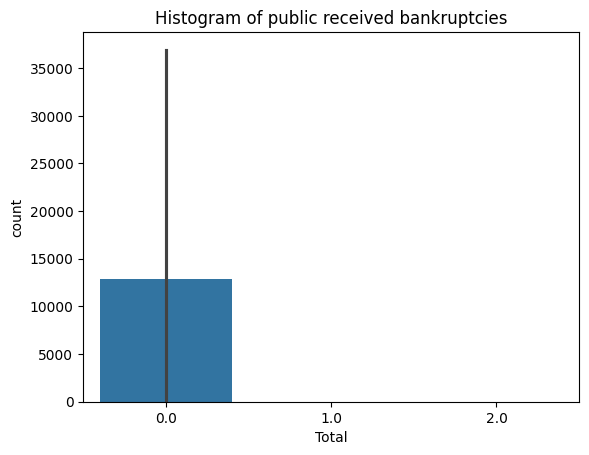

In [ ]:
sns.barplot(x=Loan_df['pub_rec_bankruptcies'],y=Loan_df['pub_rec_bankruptcies'].value_counts())
plt.title("Histogram of public received bankruptcies")
plt.xlabel("Total")
plt.show()

Most of the people (93%) have not declared bankruptcies.

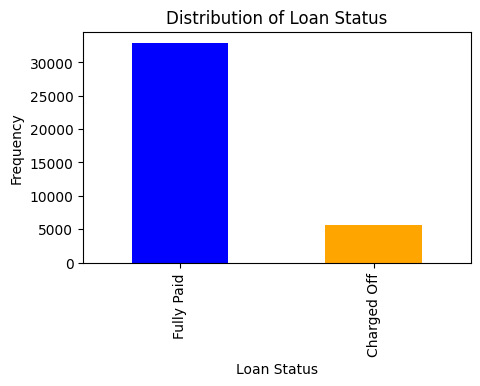

In [ ]:
plt.figure(figsize=(5, 3))

Loan_df['loan_status'].value_counts().plot(kind='bar',color=['blue', 'orange'])
plt.title("Distribution of Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Frequency")
plt.show()

Observation : Defaulted loans are low compared to Fully Paid loans

Text(0, 0.5, 'Frequency')

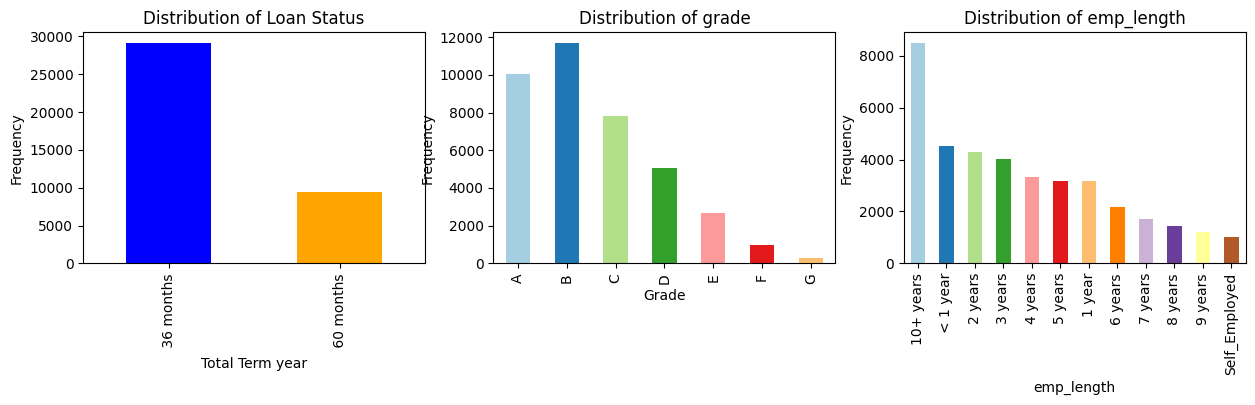

In [ ]:
plt.figure(figsize=(15, 3))

# First subplot
plt.subplot(1, 3, 1)  # (rows, columns, index of the plot)
Loan_df['term'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Distribution of Loan Status")
plt.xlabel("Total Term year")
plt.ylabel("Frequency")

# Second subplot
plt.subplot(1, 3, 2)
value_counts = Loan_df['grade'].value_counts().sort_index()
colors = plt.cm.Paired(range(len(value_counts)))
value_counts.plot(kind='bar', color=colors)
plt.title("Distribution of grade")
plt.xlabel("Grade")
plt.ylabel("Frequency")

# Third subplot
plt.subplot(1, 3, 3)
value_counts = Loan_df['emp_length'].value_counts()
colors = plt.cm.Paired(range(len(value_counts)))
value_counts.plot(kind='bar', color=colors)
plt.title("Distribution of emp_length")
plt.xlabel("emp_length")
plt.ylabel("Frequency")

Observation :

1. 36 Months loan term has been taken by most of the people where 60 months is less

2. Maximum loans were taken by people who has 10+ years of experience.

3. Most loans has grade A & B compare to others. Means higher grades loans were taken.



Text(0, 0.5, 'Frequency')

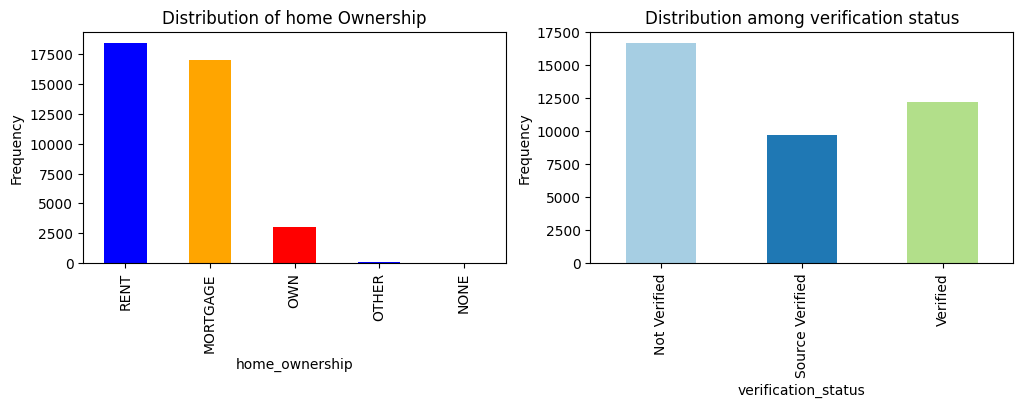

In [ ]:
plt.figure(figsize=(12, 3))

# First subplot
plt.subplot(1, 2, 1)  # (rows, columns, index of the plot)
Loan_df['home_ownership'].value_counts().plot(kind='bar', color=['blue', 'orange','red'])
plt.title("Distribution of home Ownership")
plt.ylabel("Frequency")

# Second subplot
plt.subplot(1, 2, 2)
value_counts = Loan_df['verification_status'].value_counts().sort_index()
colors = plt.cm.Paired(range(len(value_counts)))
value_counts.plot(kind='bar', color=colors)
plt.title("Distribution among verification status")
plt.ylabel("Frequency")

In [ ]:
Loan_df['verification_status'].value_counts()/Loan_df['verification_status'].shape[0]

,count
verification_status,
Not Verified,0.432745
Verified,0.316406
Source Verified,0.250849


Observation ⁉

1. Most people who have taken the loan don't own their house.

2. More than 50% people who took the loan, either verified or source verified.

In [ ]:
Loan_df['Issue_year'] = pd.to_datetime(Loan_df['issue_d'] + '-01', format='%b-%y-%d').dt.year

Text(0, 0.5, 'Frequency')

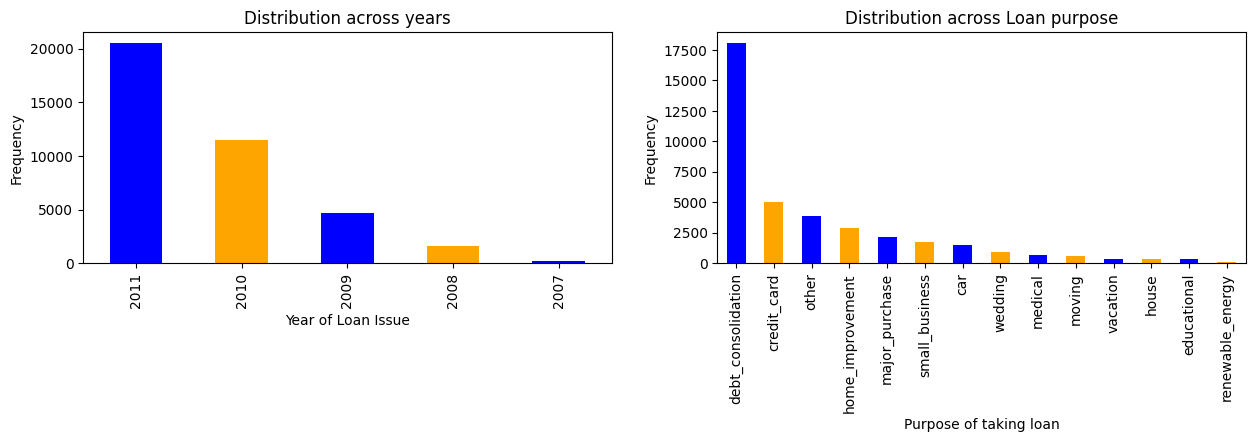

In [ ]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 2, 1)
Loan_df['Issue_year'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Distribution across years")
plt.xlabel("Year of Loan Issue")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
Loan_df['purpose'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Distribution across Loan purpose")
plt.xlabel("Purpose of taking loan")
plt.ylabel("Frequency")

Observation :

Loan issue is getting doubled each year from 2007 to 2011.

More number of people took loan due to debt_consolidation.

#Segmented Univariate Analysis

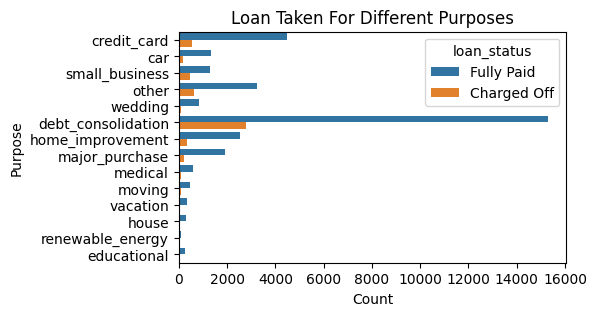

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data=Loan_df,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

Observation : Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

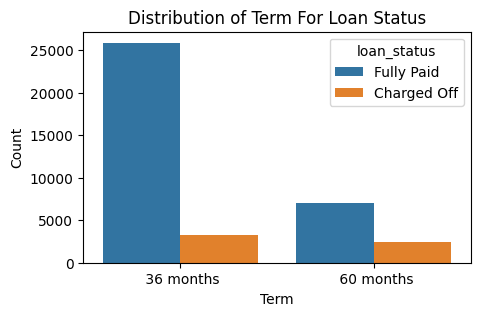

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data=Loan_df,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

Observation : 36 months has higher fully paid users but more defaulted users are who opt 60 months Loan Term

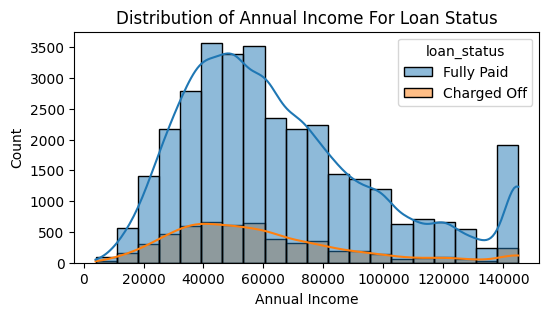

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(data=Loan_df,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

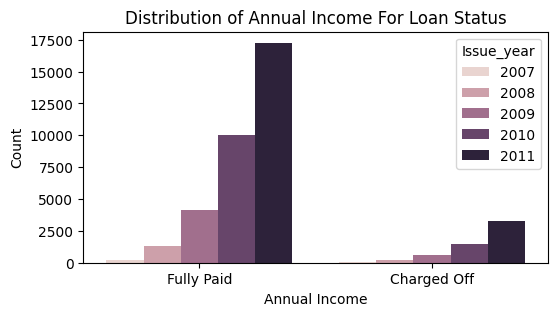

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(data=Loan_df,x='loan_status',hue='Issue_year')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

Observation : The trend of defaulting of users is increasing year on year from 2007 to 2011.

Verification Status Distribution:
 verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64


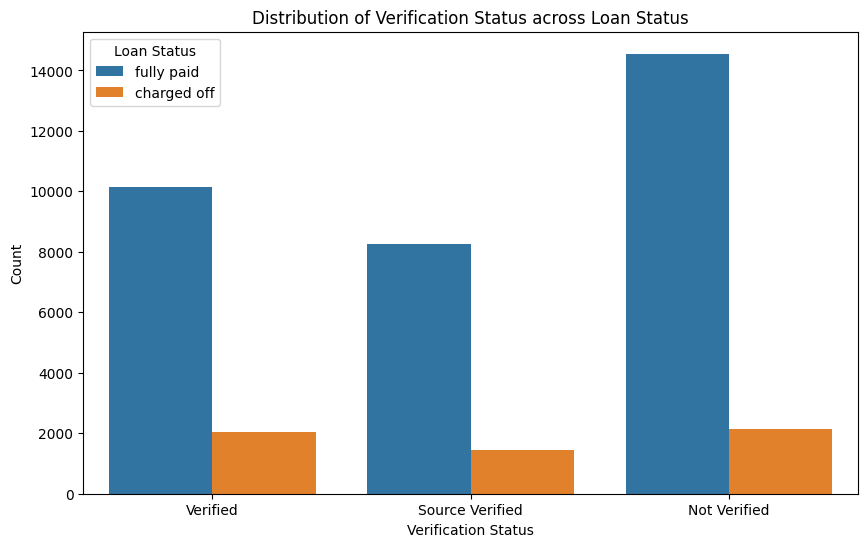

In [ ]:
verification_status_counts = Loan_df['verification_status'].value_counts()
print("Verification Status Distribution:\n", verification_status_counts)

# Bar plot for counts of 'verification_status' across 'loan_status'
plt.figure(figsize=(10, 6))
sns.countplot(data=Loan_df, x='verification_status', hue='loan_status')
plt.title("Distribution of Verification Status across Loan Status")
plt.xlabel("Verification Status")
plt.ylabel("Count")
plt.legend(title='Loan Status')
plt.show()

Observation : There are high % of users out of total verified users who are defaulted compare to Source Verified or Not Verified.

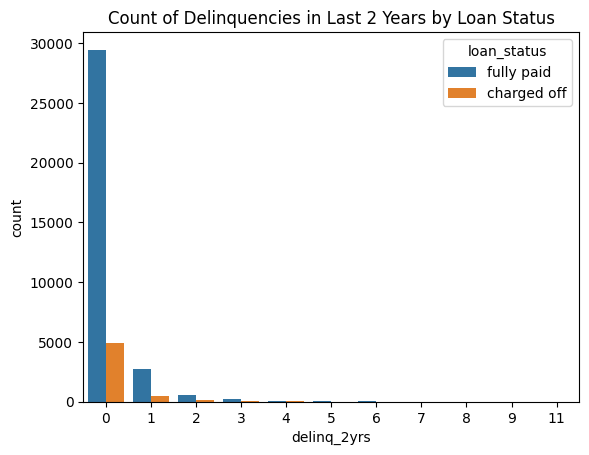

In [ ]:
sns.countplot(x='delinq_2yrs', hue='loan_status', data=Loan_df)
plt.title("Count of Delinquencies in Last 2 Years by Loan Status")
plt.show()


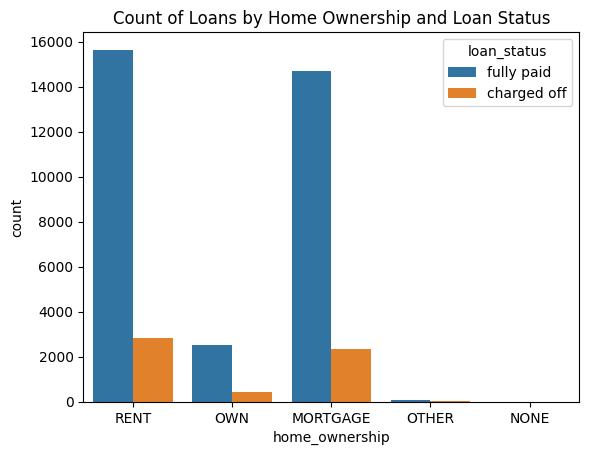

In [ ]:
sns.countplot(x='home_ownership', hue='loan_status', data=Loan_df)
plt.title("Count of Loans by Home Ownership and Loan Status")
plt.show()

Observation : In the above plot, it is observed that in 'Mortgage' category, there are high no of charged off customers

#Bivariate Analysis / Multivariate Analysis

Categorical Variables: grade, home_ownership, verification_status, purpose.

The following sections analyse the categorical variables

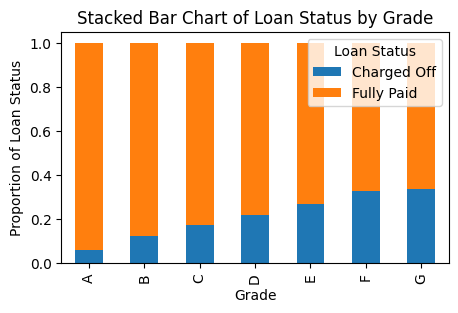

In [ ]:
grade_loan_status_counts = Loan_df.groupby(['grade', 'loan_status']).size().unstack()

# Normalize counts to get proportions within each grade
grade_loan_status_props = grade_loan_status_counts.div(grade_loan_status_counts.sum(axis=1), axis=0)

# Plot stacked bar chart for 'grade' and 'loan_status'
grade_loan_status_props.plot(kind='bar', stacked=True, figsize=(5, 3), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Stacked Bar Chart of Loan Status by Grade")
plt.xlabel("Grade")
plt.ylabel("Proportion of Loan Status")
plt.legend(title="Loan Status")
plt.show()

Here we have proportion of charged off customers, which is a good insight:

We can clearly see, how the charged off customers(blue color) increased with lower grade

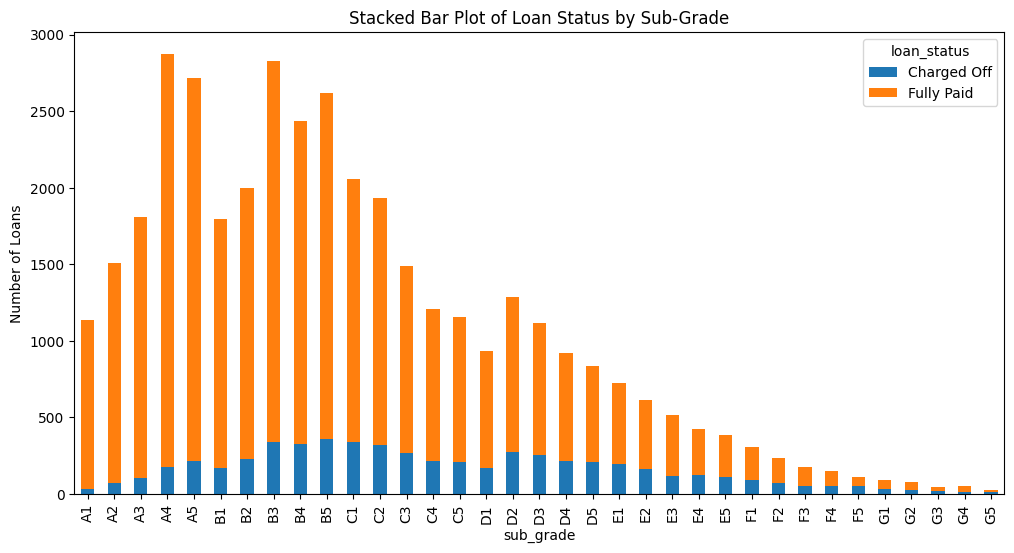

In [ ]:
sub_grade_loan_status = Loan_df.groupby(['sub_grade', 'loan_status']).size().unstack().fillna(0)
sub_grade_loan_status.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Stacked Bar Plot of Loan Status by Sub-Grade")
plt.ylabel("Number of Loans")
plt.show()

The above plot, we can see in the plot the contribution of charged off(blue color) customers is high towards lower grade

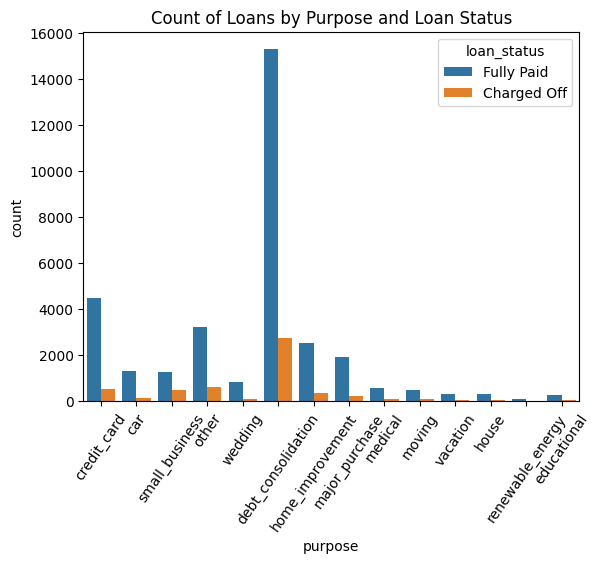

In [ ]:
sns.countplot(x='purpose', hue='loan_status', data=Loan_df)
plt.title("Count of Loans by Purpose and Loan Status")
plt.xticks(rotation=55)  # Rotate x-axis labels for better readability
plt.show()

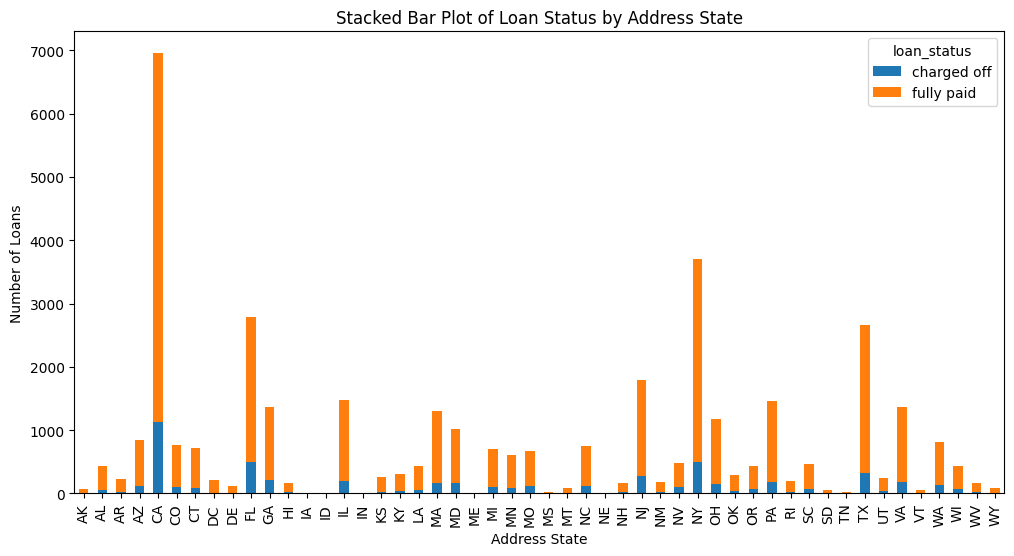

In [ ]:
addr_state_loan_status = Loan_df.groupby(['addr_state', 'loan_status']).size().unstack().fillna(0)

# Correcting the sort_index syntax
addr_state_loan_status.sort_index(ascending=True).plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title("Stacked Bar Plot of Loan Status by Address State")
plt.ylabel("Number of Loans")
plt.xlabel("Address State")
plt.show()

California has highest count with fully paid as well as charged off. However the proportion seems to be close to consistent across most states.

California, Florida, Texas, New York have high loan volumes. These states might have more factors contributing to defaults.

Verification Status Distribution:
 verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64


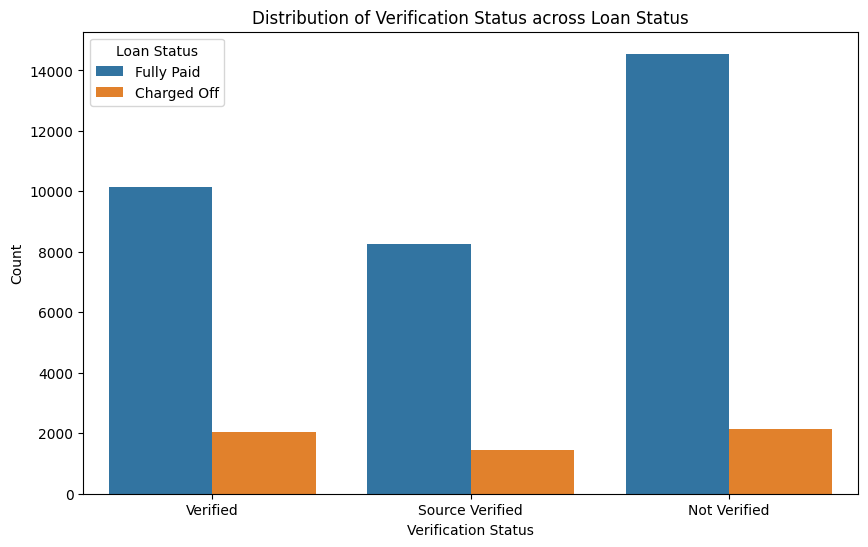

In [ ]:
verification_status_counts = Loan_df['verification_status'].value_counts()
print("Verification Status Distribution:\n", verification_status_counts)

# Bar plot for counts of 'verification_status' across 'loan_status'
plt.figure(figsize=(10, 6))
sns.countplot(data=Loan_df, x='verification_status', hue='loan_status')
plt.title("Distribution of Verification Status across Loan Status")
plt.xlabel("Verification Status")
plt.ylabel("Count")
plt.legend(title='Loan Status')
plt.show()

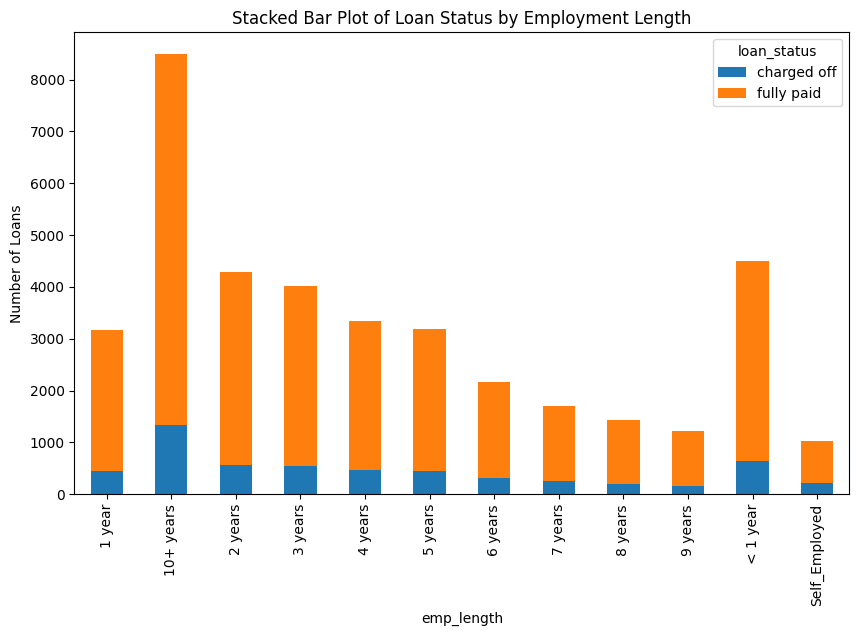

In [ ]:
emp_length_loan_status = Loan_df.groupby(['emp_length', 'loan_status']).size().unstack().fillna(0)
emp_length_loan_status.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Stacked Bar Plot of Loan Status by Employment Length")
plt.ylabel("Number of Loans")
plt.show()

Observation : The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

Just a glance at actual proportion of charged off customers

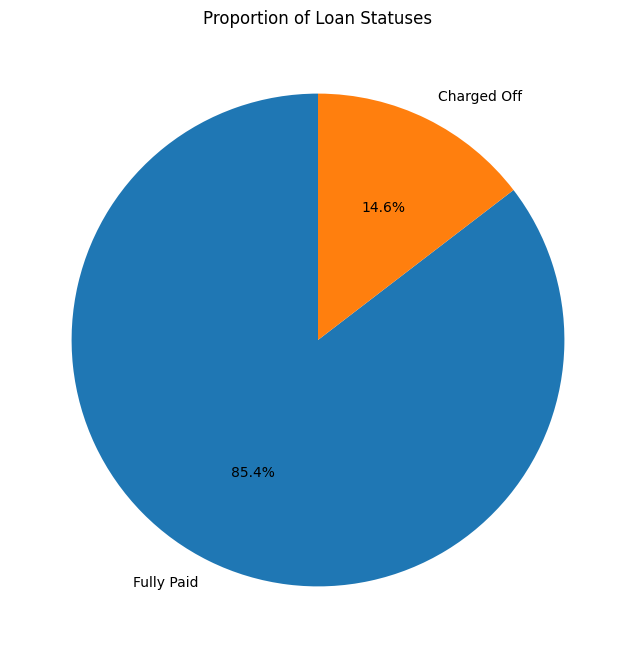

In [ ]:
loan_status_counts = Loan_df['loan_status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    loan_status_counts,
    labels=loan_status_counts.index,
    autopct='%1.1f%%',  # Display percentages
    startangle=90       # Start angle for better layout
)
plt.title("Proportion of Loan Statuses")
plt.show()

Now analysing the Numerical variables: loan_amnt, annual_inc, int_rate, dti

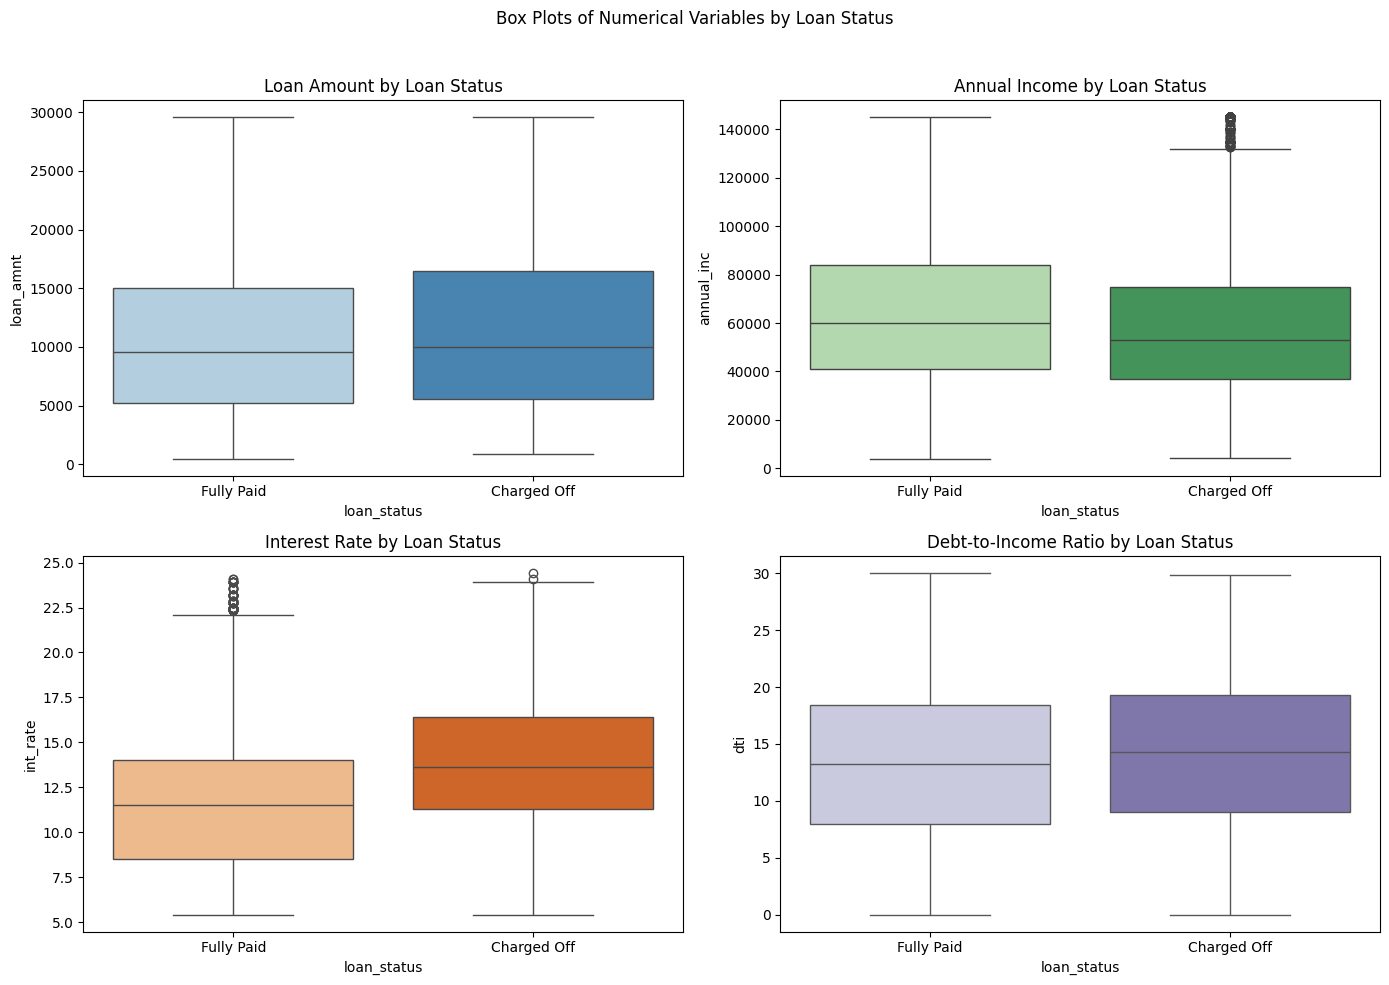

In [ ]:

# Set up a figure with multiple subplots for each variable
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Box Plots of Numerical Variables by Loan Status")

# Box plot for loan amount
sns.boxplot(data=Loan_df, x='loan_status', y='loan_amnt', hue='loan_status', ax=axes[0, 0], palette="Blues", dodge=False)
axes[0, 0].set_title('Loan Amount by Loan Status')
axes[0, 0].legend([], [], frameon=False)  # Remove legend

# Box plot for annual income
sns.boxplot(data=Loan_df, x='loan_status', y='annual_inc', hue='loan_status', ax=axes[0, 1], palette="Greens", dodge=False)
axes[0, 1].set_title('Annual Income by Loan Status')
axes[0, 1].legend([], [], frameon=False)

# Box plot for interest rate
sns.boxplot(data=Loan_df, x='loan_status', y='int_rate', hue='loan_status', ax=axes[1, 0], palette="Oranges", dodge=False)
axes[1, 0].set_title('Interest Rate by Loan Status')
axes[1, 0].legend([], [], frameon=False)

# Box plot for debt-to-income ratio
sns.boxplot(data=Loan_df, x='loan_status', y='dti', hue='loan_status', ax=axes[1, 1], palette="Purples", dodge=False)
axes[1, 1].set_title('Debt-to-Income Ratio by Loan Status')
axes[1, 1].legend([], [], frameon=False)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # To prevent title overlap with subplots
plt.show()

1. As seen above, income and interest rates appear to have strong correlations with loan status. Borrowers with low income and high interest rates are more likely to default.
2. Loan amount and dti has less impact

<Figure size 500x300 with 0 Axes>

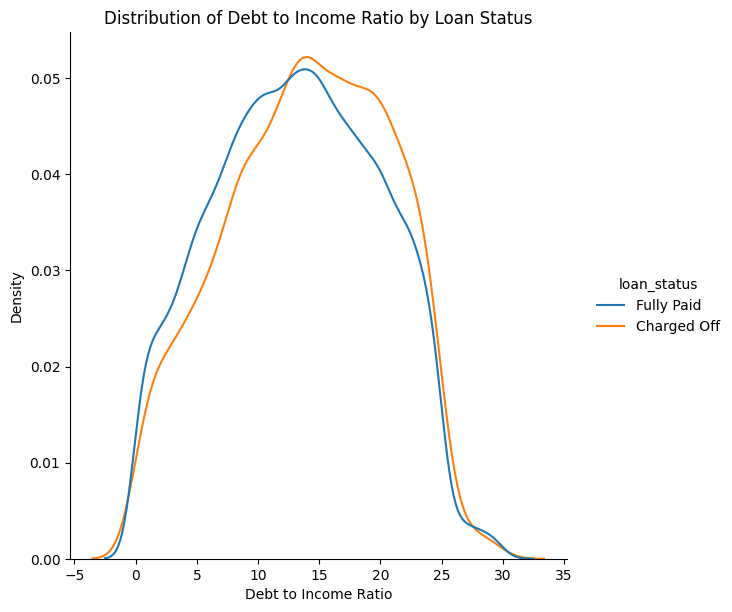

In [ ]:
plt.figure(figsize=(5, 3))
sns.displot(
    Loan_df,
    x='dti',
    hue='loan_status',  # Color by loan status
    kind='kde',  # Kernel density estimate (smooth curve)
    height=6,  # Figure height
    aspect=1,  # Aspect ratio of the plot
    common_norm=False  # Ensures distributions are not normalized across categories
)

# Title and labels
plt.title("Distribution of Debt to Income Ratio by Loan Status")
plt.xlabel("Debt to Income Ratio")
plt.ylabel("Density")

plt.show()

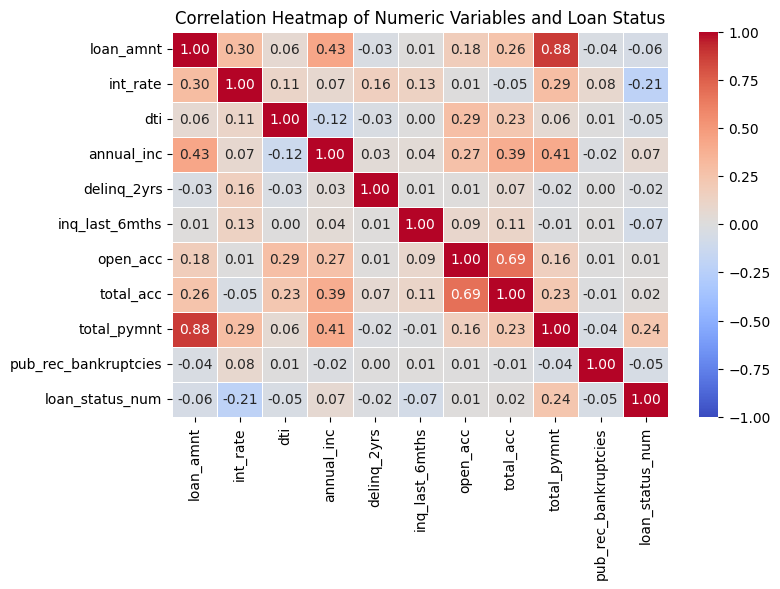

In [ ]:
Loan_df['loan_status'] = Loan_df['loan_status'].str.lower()
Loan_df['loan_status_num'] = Loan_df['loan_status'].map({'fully paid': 1, 'charged off': 0})

# Select only numeric columns (excluding non-numeric ones and the new encoded 'loan_status_numeric')
numeric_columns = ['loan_amnt', 'int_rate', 'dti', 'annual_inc',
                   'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'total_acc', 'total_pymnt',
                   'pub_rec_bankruptcies','loan_status_num']

# Calculate the correlation matrix
correlation_matrix = Loan_df[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numeric Variables and Loan Status")
plt.show()

1. Loan Amount:
  1. Strong positive correlation with total payment(0.88) which means higher loan amounts obviously have higher total payments
  2. Weak negative correlation with Loan status. Slightly suggests that higher loan amounts may be less likely to default.
2. Interest Rate:
  1. Negative correlation with loan status (-0.21) Highere interest rates are defaulting more
3. DTI:
  1. Very weak correlation with loan status (-.05) almost no impact on loan status directly
4. Annual income, no of open acc, public records have not much impact on loan status
5. Interst rates and loan amounts have decent correlation as expected conceptually.

Among all, interest rate (-0.21) is strongest, indicating high int_rate is a notable factor for default.


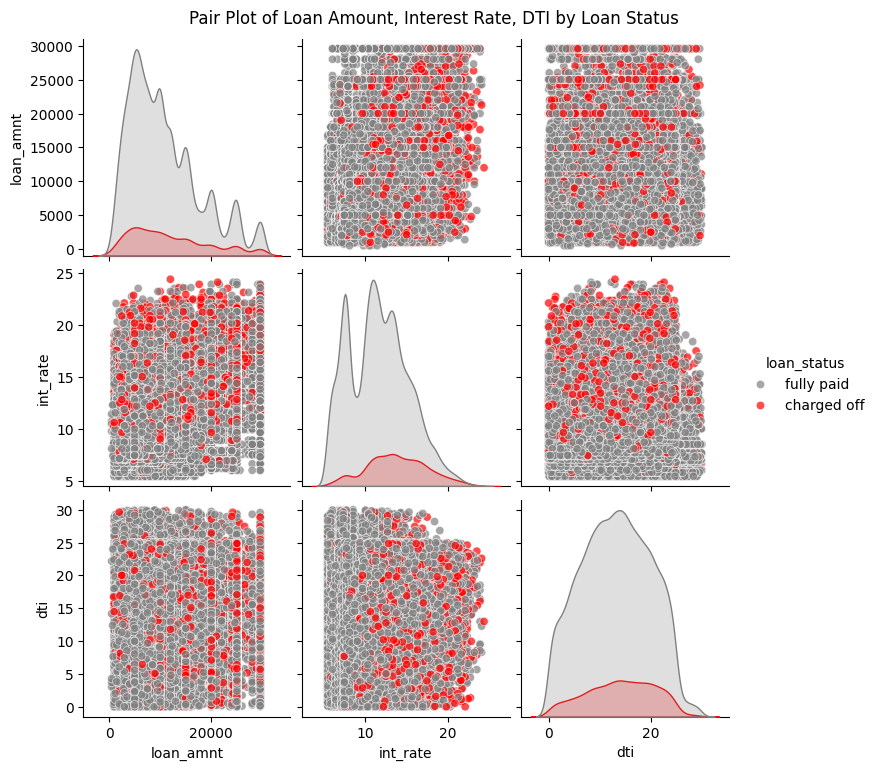

In [ ]:
# Select the numeric columns for the pair plot
pairplot_columns = ['loan_amnt', 'int_rate', 'dti']

# Create the pair plot, colored by loan_status
sns.pairplot(
    Loan_df,
    vars=pairplot_columns,  # Columns to plot
    hue='loan_status',  # Color by loan_status
    palette={'fully paid': 'grey','charged off': 'red'},  # Custom color palette
    plot_kws={'alpha': 0.7},  # Transparency for the points
)

# Title for the plot
plt.suptitle("Pair Plot of Loan Amount, Interest Rate, DTI by Loan Status",
             y=1.02)  # Adjust the title position

plt.show()

Above plot Observations:

1. Loan Amount vs. Interest Rate:
    1. Higher interest rates tend to be associated with smaller loan amounts.
    2. Charged Off loans are more concentrated in the upper-interest regions, regardless of loan amount.
2. Interest Rate vs. DTI:
    1. Similar to the first plot, higher interest rates combined with moderately high DTI values (>15) show an increased likelihood of loans being Charged Off.

3. Note:

    1. Interest Rate is a Key Predictor: Higher interest rates are strongly associated with loan defaults (Charged Off loans).
    2. Loan Amount May Play a Role: While defaults occur across all loan amounts, there may be slightly higher risks for lower loan amounts combined with higher interest rates

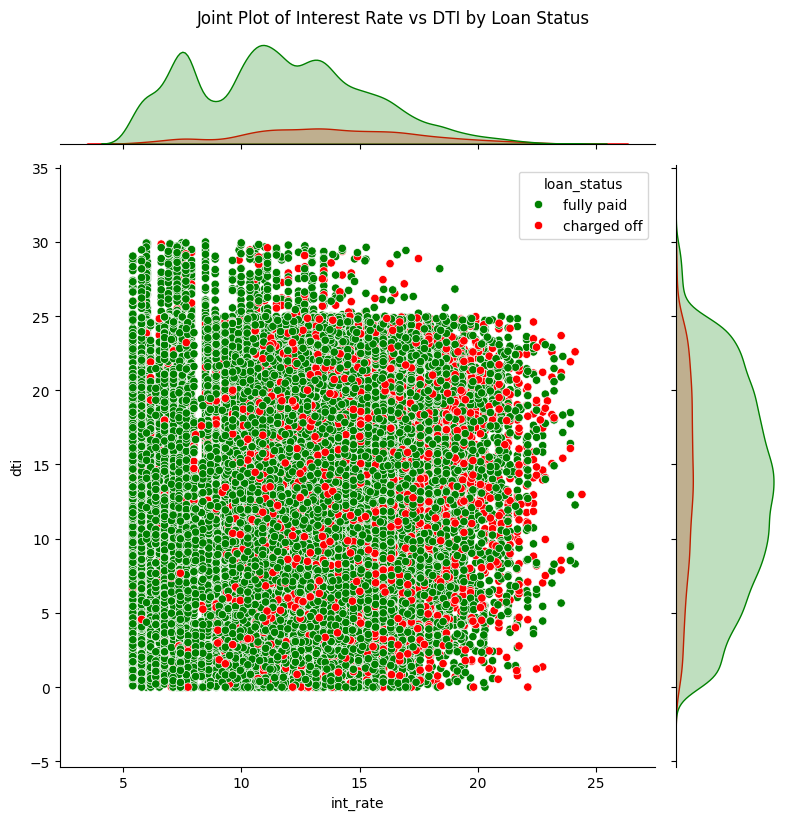

In [ ]:
# Create a joint plot for int_rate vs dti, colored by loan_status
sns.jointplot(
    data=Loan_df,
    x='int_rate',
    y='dti',
    hue='loan_status',  # Color by loan_status
    kind='scatter',  # Scatter plot for visualizing the relationship
    palette={'fully paid': 'green','charged off': 'red'},  # Custom color palette
    height=8,  # Set the size of the plot
    ratio=5,  # Ratio of the size of the scatter plot to the marginal histograms
)

# Title for the plot
plt.suptitle("Joint Plot of Interest Rate vs DTI by Loan Status", y=1.02)  # Adjust the title position

plt.show()

1. Interest Rate vs. Loan Outcome:
    1.  Higher interest rates (e.g., above ~15%) show a noticeable increase in the density of red dots, suggesting loans with higher interest rates are more likely to be charged off.
2. DTI and Loan Outcome:
    1. The distribution of debt-to-income ratios is wide for both statuses.
    2. However, higher DTI values (>20) may show a slight increase in the likelihood of being "Charged Off."
3. Distribution Shapes:
    1. The marginal distributions (shown at the top and right) reveal that most loans fall within a specific range of interest rates (around 10 to 15%) and DTI values (around 5 to 20%).

#Insights

##Univariate Analysis

1. 75% people have taken the loan below 1,50,000 amount. Very few people are taking the loan more than Rs. 2,00,000.

2. Maximum Installment lies between 100 to 450. Few people have decided to keep more income

3. Most of the people (93%) have not declared bankruptcies.

4. Defaulted loans are low compared to Fully Paid loans

5. 36 Months loan term has been taken by most of the people where 60 months is less

6. Maximum loans were taken by people who has 10+ years of experience.

7. Most loans has grade A & B compare to others. Means higher grades loans were taken.

8. Most people who have taken the loan don't own their house.

9. More than 50% people who took the loan, either verified or source verified.

10. Loan issue is getting doubled each year from 2007 to 2011.

11. More number of people took loan due to debt_consolidation.

###Segmented Univariate Analysis

1. Loan term of 36 months has higher fully paid users but more defaulted users are who opt 60 months Loan Term.

2. Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

3. The trend of defaulting of users is increasing year on year from 2007 to 2011.

4. The Loan Status varies with DTI ratio, loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.

5. There are high % of users out of total verified users who are defaulted compare to Source Verified or Not Verified.

6. It is observed that in 'Mortgage' category, there are high no of charged off customers.

7. The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

###Bivariate / Multivariate Analysis

1. As the Grades are increasing (A to G) indicating risky customers from Grade A to G, have higher charged off customers(blue color) compare to grade A and B.

2. Higher interest rates (e.g., above ~15%) show a noticeable increase in the density, suggesting loans with higher interest rates are more likely to be charged off.

3. The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.